## Calcular derivadas
Vamos a usar diferentes tecnicas para intertar aproximar la derivada de un campo, en este caso el campo va a ser unidimensional.

Usaremos la función $f(x) = \frac{1}{cosh(x)}$

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
longitud = 20
cantidadPuntos = 1000
dx = longitud / cantidadPuntos
x = np.arange(-longitud / 2, longitud / 2, dx)

valorFuncionPrimitiva = -2 * np.arctan(np.exp(-x))
valorFuncion = 1 / np.cosh(x)
valorFuncionDerivada = - np.sinh(x) / np.power(np.cosh(x), 2)   
valorFuncionDerivadaSegunda = 2* np.power(np.sinh(x), 2) / np.power(np.cosh(x), 3) - 1 / np.cosh(x)   

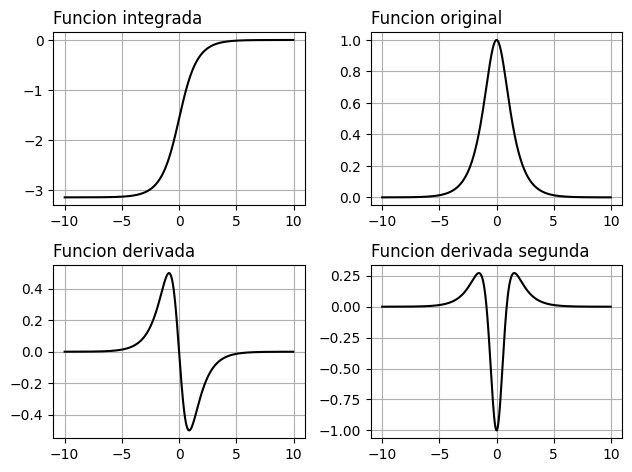

In [4]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, valorFuncionPrimitiva, 'k-')
plt.grid(True)
plt.title('Funcion integrada', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 2)
plt.plot(x, valorFuncion, 'k-')
plt.grid(True)
plt.title('Funcion original', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 3)
plt.plot(x, valorFuncionDerivada, 'k-')
plt.grid(True)
plt.title('Funcion derivada', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 2, 4)
plt.plot(x, valorFuncionDerivadaSegunda, 'k-')
plt.grid(True)
plt.title('Funcion derivada segunda', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

### Métodos 
Vamos a tener un par de metodos para calcular dicha derivada, estan van a ser:
 * Convolución con aproximación de delta de dirac $f(x) \ast \delta'(x) = f'(x)$
 * Convolución con métodos clasicos de derivadas
 * Aplicando propiedades de la transformada de Fourier $\hat{\left(\frac{d^n}{dx^n}f(x) \right)} = (i \cdot \omega)^n \hat{f}(\omega)$

En las primeras dos usaremos la transformada de Fourier para simplificar el calculo, ya que $\hat{\left(f(x) \ast g(x) \right)} = \hat{f}(\omega) \cdot \hat{g}(\omega)$

##### Aproximando delta de dirac
Vamos a aproximar la distribución delta de dirac como una gausseana $\delta(x) = \lim\limits_{\sigma \to 0} \frac{1}{\sqrt{2 \pi} \sigma} exp\left(-\frac{x^2}{2 \cdot \sigma^2} \right)$ y simplemente truncaremos el valor de sigma para la separación entre los puntos. De nuevo, usaremos la transformada de Fourier de estos puntos para hacer la convolución.

In [5]:
def ValoresParaFFT(x, conShift = True):
    puntos = x
    if conShift:
        puntos = np.fft.fftshift(x)
    return np.abs(puntos) + 1

In [6]:
def CampanaDeGauss(x, mu, sigma):
    factor = 1 / (np.sqrt(2 * np.pi) * sigma)
    return factor * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

def CampanaDeGaussDerivada(x, mu, sigma):
    factor = (x - mu) / (np.sqrt(2 * np.pi) * sigma ** 3)
    y = factor * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
    return np.fft.fft(np.fft.ifftshift(y / np.sum(CampanaDeGauss(x, mu, sigma))))

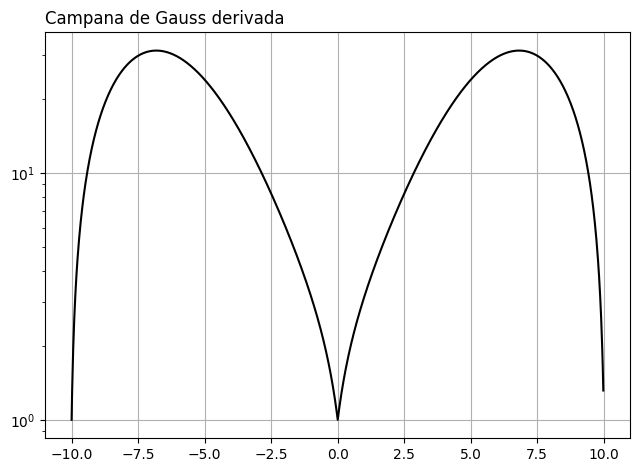

In [7]:
kernelDirac = -CampanaDeGaussDerivada(x, 0, dx)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelDirac, False), 'k-')
plt.grid(True)
plt.title('Campana de Gauss derivada', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

##### Aproximacion tradicional
Usaremos los coeficientes de las aproximaciones tradicionales de las derivas como $$ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} $$ hasta orden 3 para tener una buena aproximación la derivada, y al convolucionarlo deberíamos conseguir una derivada para la función en todo el campo. Lo mismo que en la aproximación anterior, usaremos la transformada de Fourier de estos puntos para hacer la convolución.

In [8]:
def AproximacionTradicional(x, dx, orden):
    largo = len(x)
    puntoMedio = int(np.floor(largo / 2))

    y = np.zeros(largo)
    valores = np.array([4/5, -1/5, 4/105, -1/280])

    for i, valor in enumerate(valores):
        y[puntoMedio + i + 1] = -valor
        y[puntoMedio - i - 1] = valor

    y = np.fft.fft(np.fft.ifftshift(y / dx))
    return (y) ** orden

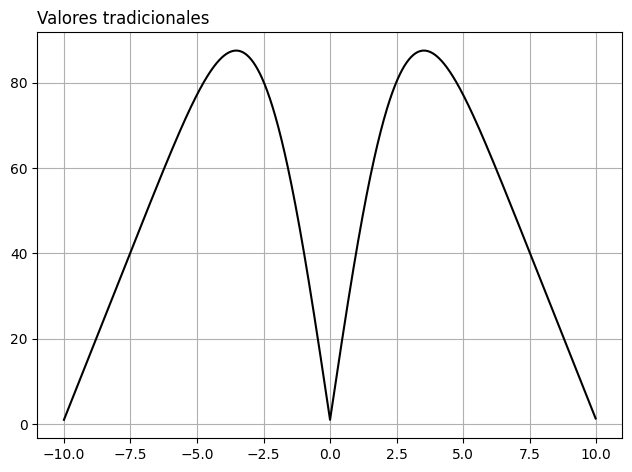

In [9]:
kernelTradicional = AproximacionTradicional(x, dx, 1)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelTradicional, False), 'k-')
plt.grid(True)
plt.title('Valores tradicionales', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

### Calcular las derivadas
Para los 3 casos necesitaremos transformar el campo, dejandonos con el siguiente campo

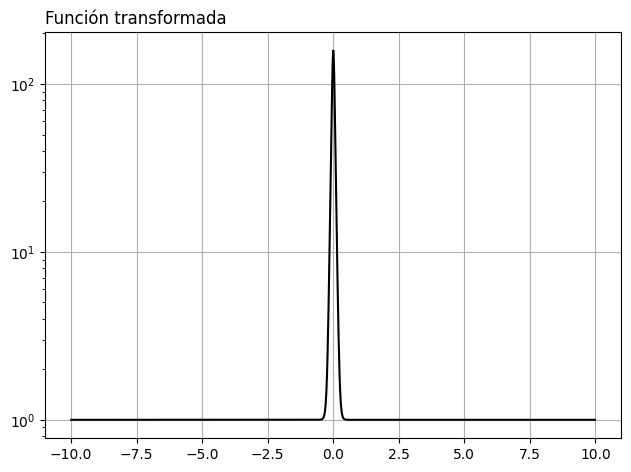

In [10]:
valorTransformado = np.fft.fft(valorFuncion)

plt.figure()

plt.plot(x, ValoresParaFFT(valorTransformado), 'k-')
plt.grid(True)
plt.title('Función transformada', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

In [11]:
def ReducirEspacio(valor, reduccion):
    return valor[reduccion : len(valor) - reduccion - 1]

reduccion = 25
xReducido = ReducirEspacio(x, reduccion)

In [12]:
def MostrarFuncionYDiferencia(x, funcionAproximada, funcionAnalitica):
    diferencia = funcionAproximada - funcionAnalitica

    plt.figure()

    plt.subplot(2, 1, 1)
    plt.plot(x, diferencia, 'k-')
    plt.grid(True)
    plt.title('Diferencia', loc = 'left')
    plt.tight_layout(pad=1.0)

    plt.subplot(2, 1, 2)
    plt.plot(x, funcionAproximada, 'k-')
    plt.plot(x, funcionAnalitica, 'r-')
    plt.grid(True)
    plt.legend(['Función aproximada', 'Función analitica'])
    plt.title('Aproximacion', loc = 'left')
    plt.tight_layout(pad=1.0)

    plt.show()

    error = "{:.3e}".format(np.max(abs(diferencia)))
    print(f"Con un maximo de error del {error}")

#### Método de dirac

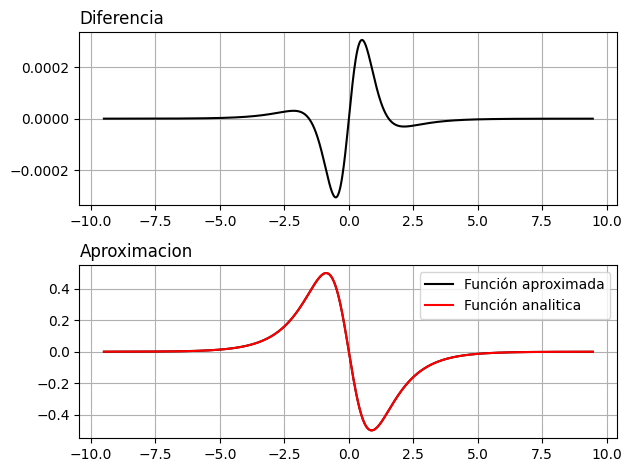

Con un maximo de error del 3.047e-04


In [13]:
valorAproximado = np.real(np.fft.ifft(valorTransformado * kernelDirac))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivada, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

#### Método tradicional

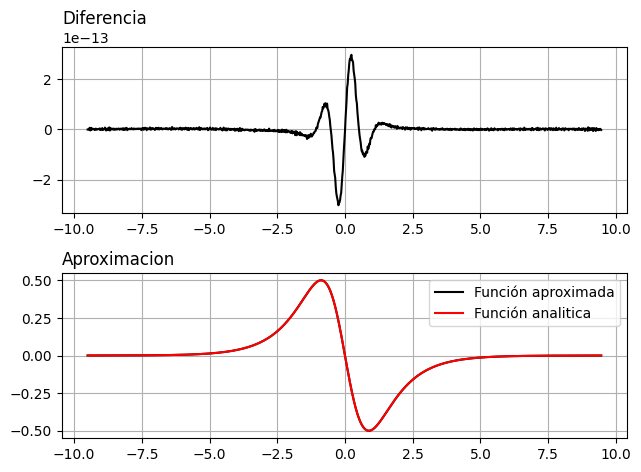

Con un maximo de error del 3.015e-13


In [14]:
valorAproximado = np.real(np.fft.ifft(valorTransformado * kernelTradicional))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivada, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

#### Método transformada

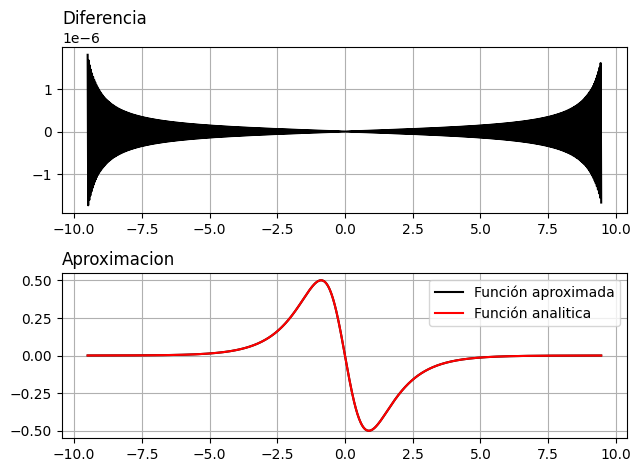

Con un maximo de error del 1.811e-06


In [15]:
kappa = 2 * np.pi * np.fft.fftfreq(cantidadPuntos, d = dx)
orden = 1

valorAproximado = np.real(np.fft.ifft(np.power((1j) * kappa, orden) * valorTransformado))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivada, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

Hay que aclarar, que tiene dificultades este metodo con funciones con extremos diferentes, es decir no periodicas.

## Derivada segunda
Ahora veamos el método tradicional para segunda derivada, y que tanta aproximacion tiene

### Calculando el kernel
De la misma forma que antes encontraremos la función que al multiplicarla con la transformada de la función nos de su derivada. En este este caso esta dada por

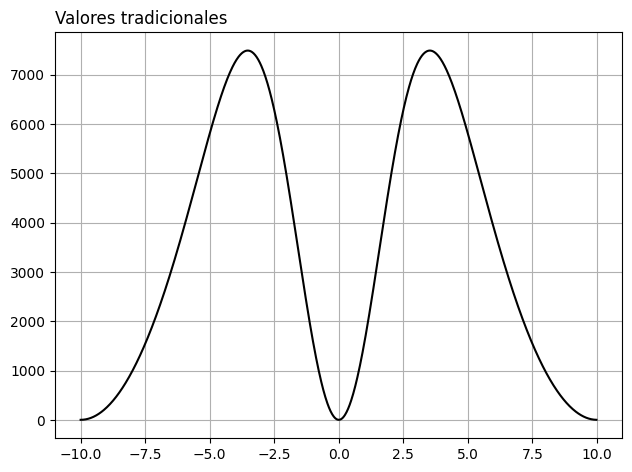

In [16]:
kernelTradicional = AproximacionTradicional(x, dx, 2)

plt.figure()

plt.plot(x, ValoresParaFFT(kernelTradicional, False), 'k-')
plt.grid(True)
plt.title('Valores tradicionales', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

Produciendo la siguiente derivada segunda

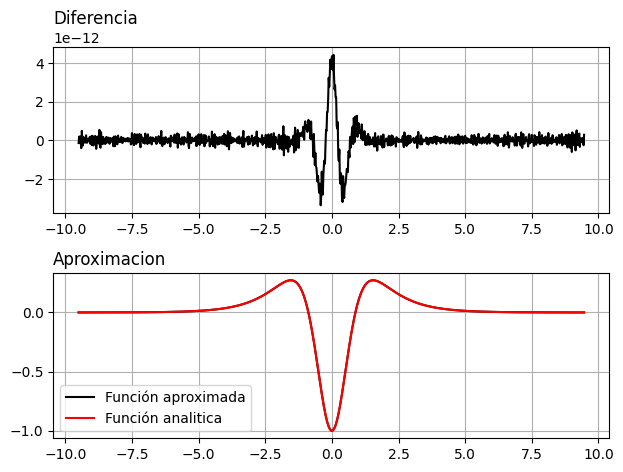

Con un maximo de error del 4.416e-12


In [17]:
valorAproximado = np.real(np.fft.ifft(valorTransformado * kernelTradicional))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionDerivadaSegunda, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)

### Calcular integrales


C:\Users\usuario\AppData\Local\Temp\ipykernel_8824\2845610172.py:14: RuntimeWarning: invalid value encountered in reciprocal
  return (y) ** orden


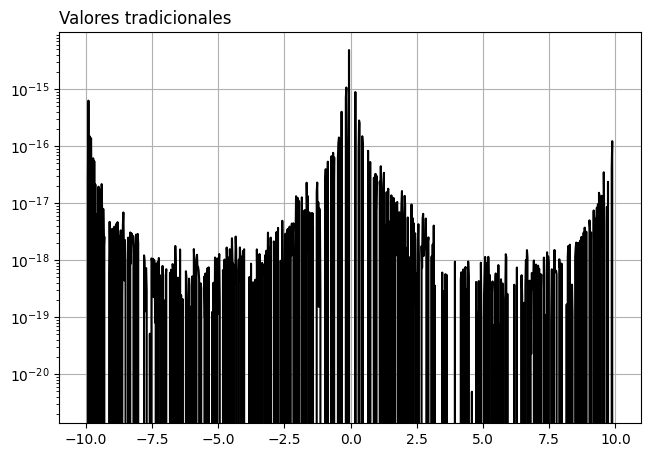

In [18]:
kernelTradicional = AproximacionTradicional(x, dx, -1)

plt.figure()

plt.plot(x, np.real(np.fft.fftshift(kernelTradicional)), 'k-')
plt.grid(True)
plt.title('Valores tradicionales', loc = 'left')
plt.tight_layout(pad=1.0)
plt.yscale('log')

plt.show()

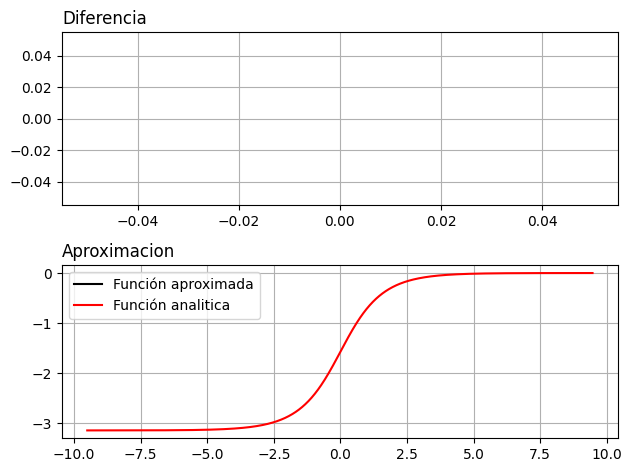

Con un maximo de error del nan


In [19]:
valorAproximado = np.real(np.fft.ifft(valorTransformado * kernelTradicional))
valorAproximado = ReducirEspacio(valorAproximado, reduccion)

valorOriginal = ReducirEspacio(valorFuncionPrimitiva, reduccion)
MostrarFuncionYDiferencia(xReducido, valorAproximado, valorOriginal)